In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data = data.fillna(0)

In [5]:
data.shape

(37670293, 24)

In [6]:
pd.set_option('display.max_columns', None)
data.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21


In [63]:
clusters = data['hotel_cluster'].value_counts(dropna=False, sort=True).to_frame()
clusters = clusters.reset_index()
clusters.columns = ['ids', 'counts']

In [8]:
clusters

,ids,counts
0,91,1043720
1,41,772743
2,48,754033
3,64,704734
4,65,670960
5,5,620194
6,98,589178
7,59,570291
8,42,551605
9,21,550092


In [64]:
clu_cnt = clusters['counts'].tolist()
clu_ids = clusters['ids'].tolist()

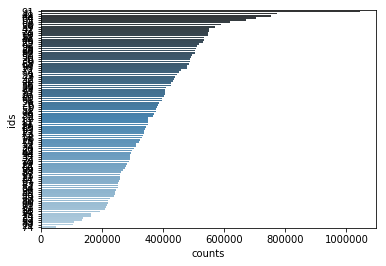

In [68]:
sns.barplot(x="counts", y="ids", data=clusters, palette="Blues_d", order=clu_ids, orient='h')
plt.show()

In [83]:
couns = data.loc[data['hotel_country'] == 1]

In [86]:
countries = couns['hotel_cluster'].value_counts(dropna=False, sort=True).to_frame()
countries = countries.reset_index()
countries.columns = ['ids', 'counts']

In [93]:
new = data[['hotel_continent', 'hotel_cluster']]

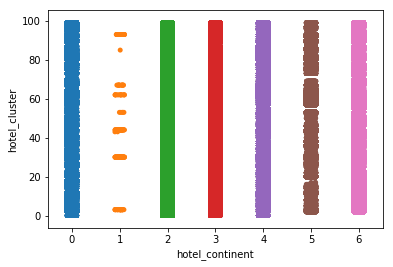

In [94]:
sns.stripplot(x="hotel_continent", y="hotel_cluster",jitter=True, data=new)
plt.show()

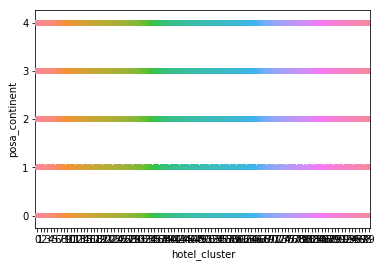

In [9]:
region_user_hotel = data[['hotel_cluster', 'posa_continent']]
sns.stripplot(x="hotel_cluster", y="posa_continent", jitter=True, data=region_user_hotel)
plt.show()

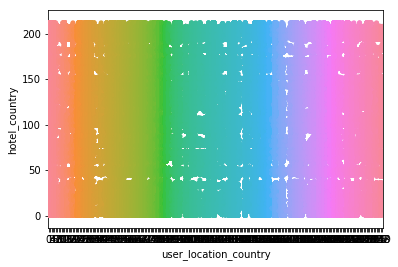

In [96]:
couns = data.loc[data['user_location_country'] == 1]
country_user_hotel = data[['user_location_country', 'hotel_country']]
sns.stripplot(x="user_location_country", y="hotel_country",jitter=True, data=country_user_hotel)
plt.show()

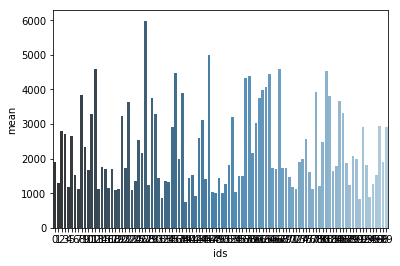

In [102]:
distance_cluster = data.groupby(['hotel_cluster'])['orig_destination_distance'].mean()
distance_cluster = distance_cluster.reset_index()
distance_cluster.columns = ['ids', 'mean']
distance_cluster.sort_values(by=['mean'])
sns.barplot(y="mean", x="ids", data=distance_cluster, palette="Blues_d")
plt.show()

In [4]:
data['srch_co'] = pd.to_numeric(data.srch_co.str.replace('-',''))

In [5]:
data['srch_ci'] = pd.to_numeric(data.srch_ci.str.replace('-',''))

In [6]:
data = data.fillna(0)

In [7]:
data['stay_time'] = data.apply(lambda x: float(x['srch_co']) - float(x['srch_ci']), axis=1)

In [8]:
duration_cluster = data.groupby(['hotel_cluster'])['stay_time'].mean()

In [17]:
duration_cluster = duration_cluster.reset_index()
duration_cluster.columns = ['ids', 'duration']

In [19]:
dur = duration_cluster['duration'].tolist()
ids = duration_cluster['ids'].tolist()

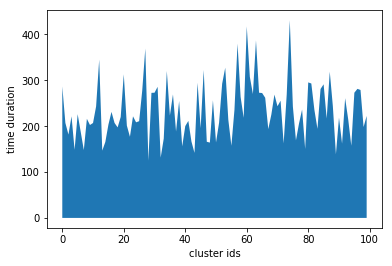

In [24]:
plt.stackplot(ids, dur)
plt.xlabel("cluster ids")
plt.ylabel("time duration")
plt.show()

In [ ]:
srch_destination_id, hotel_market, hotel_cluster

In [23]:
len(data['srch_destination_id'].unique())

59455

In [25]:
destination_cluster = data.groupby(['hotel_cluster'])['srch_destination_id'].median()
destination_cluster = destination_cluster.reset_index()
destination_cluster.columns = ['ids', 'destination_id']

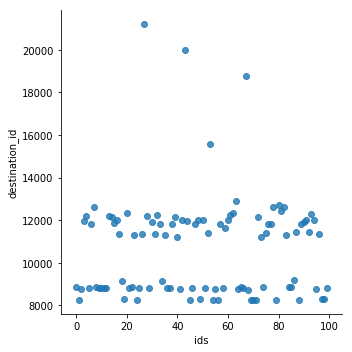

In [27]:
sns.lmplot(x="ids", y="destination_id", data=destination_cluster, fit_reg=False, scatter=True)

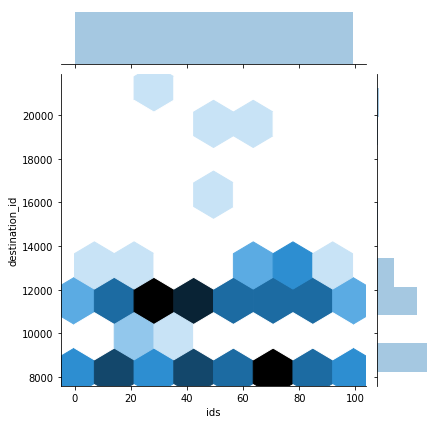

In [30]:
sns.jointplot("ids", "destination_id", data=destination_cluster, kind="hex")

In [38]:
destination_cluster_mean = data.groupby(['hotel_cluster']).agg(lambda x: stats.mode(x['srch_destination_id'])[0])

In [48]:
destination_cluster_maxapp = destination_cluster_mean[['hotel_cluster', 'srch_destination_id']]

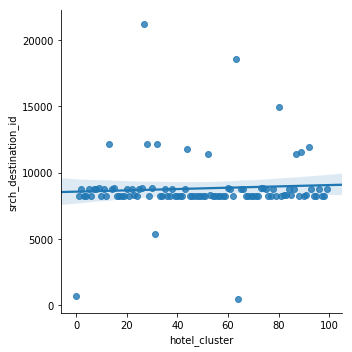

In [52]:
sns.lmplot(x="hotel_cluster", y="srch_destination_id", data=destination_cluster_maxapp)

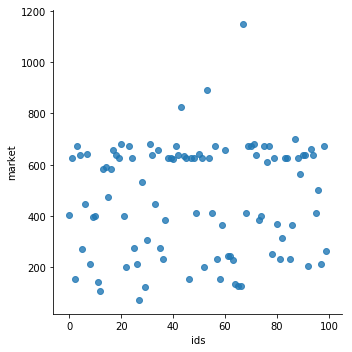

In [50]:
market_cluster = data.groupby(['hotel_cluster'])['hotel_market'].median()
market_cluster = market_cluster.reset_index()
market_cluster.columns = ['ids', 'market']
sns.lmplot(x="ids", y="market", data=market_cluster, fit_reg=False, scatter=True)

In [53]:
market_cluster_aggmax = data.groupby(['hotel_cluster']).agg(lambda x: stats.mode(x['hotel_market'])[0])

In [58]:
market_cluster_aggmax = market_cluster_aggmax.reset_index()
market_cluster_aggmax.columns = ['hotel_cluster', 'date_time', 'site_name', 'posa_continent', \
                                 'user_location_country', 'user_location_region', 'user_location_city', 
                                'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', \
                                'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', \
                                'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', \
                                'hotel_continent', 'hotel_country', 'hotel_market', 'stay_time']

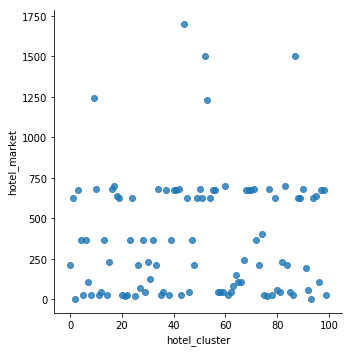

In [59]:
market_cluster_agg = market_cluster_aggmax[['hotel_cluster', 'hotel_market']]
sns.lmplot(x="hotel_cluster", y="hotel_market", data=market_cluster_agg, fit_reg=False, scatter=True)

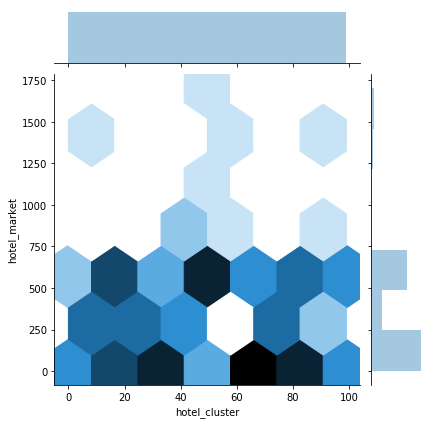

In [60]:
sns.jointplot("hotel_cluster", "hotel_market", data=market_cluster_agg, kind="hex")